# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа AIMasters, 2022

## Студент: Алексеев Илья Алексеевич

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [1]:
# general
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
from seaborn import heatmap
import pandas as pd
from collections import defaultdict

# knn
from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score
%load_ext autoreload
%autoreload 2

# data
from sklearn.datasets import fetch_openml
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# augmentation
from skimage.transform import rotate
from scipy.ndimage import shift
from scipy.ndimage import gaussian_filter
from cv2 import erode
from cv2 import dilate
from cv2 import morphologyEx
from cv2 import MORPH_OPEN
from cv2 import MORPH_CLOSE

# backup tools
import dill
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
sns.set(style='whitegrid', palette='deep', font_scale=1.5, rc={'figure.figsize':(8,6), 'lines.linewidth': 4})

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [3]:
# модуль скачивает файлы с сайта yann.lecun.com
# приложен к проекту
from mnist import mnist
X_train, y_train, X_test, y_test = mnist()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

### 2. Исследование скорости методов поиска (4 балла)

Исследуйте, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из
модуля time, либо magic-командой %time, которая запускает код лишь один раз.

In [4]:
args = {'n_neighbors': 5,
        'metric': 'euclidean',
        'weights': 'uniform',
        'batch_size': 2000}

algorithms = ['kd_tree', 'ball_tree', 'brute', 'my_own']

def select_features(X_train, X_test, n_to_select):
    n_features = X_train.shape[1]
    indices = np.random.choice(n_features, size=n_to_select, replace=False)
    return X_train[:, indices], X_test[:, indices]

In [5]:
time_records = defaultdict(list)

for n_to_select in [10, 20, 100]:
    X_sel_train, X_sel_test = select_features(X_train, X_test, n_to_select)
    for algo in algorithms:
        model = BatchedKNNClassifier(algorithm=algo, **args)
        model.fit(X_sel_train, y_train)
        
        time1 = time()
        model.kneighbors(X_sel_test, False)
        time2 = time()
        
        time_records[algo].append(time2 - time1)

In [6]:
! mkdir '/content/drive/MyDrive/aiknn'
dill.dump_session('/content/drive/MyDrive/aiknn/session.db')

mkdir: cannot create directory ‘/content/drive/MyDrive/aiknn’: File exists


#### Приведите график / таблицу с результатами вашего эксперимента

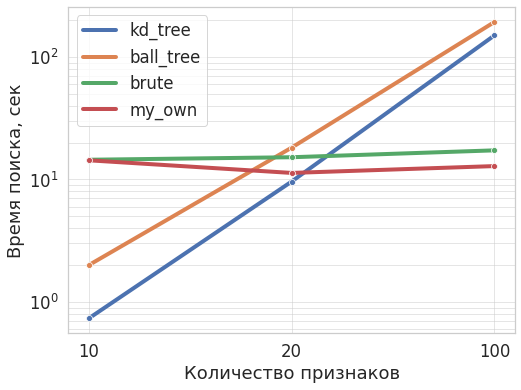

In [23]:
ax = sns.lineplot(data=time_records, dashes=False, marker='o')

ax.set_yscale('log')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['10', '20', '100'])


ax.grid(which='both', alpha=0.5)
ax.set_xlabel('Количество признаков')
ax.set_ylabel('Время поиска, сек')

plt.show()

#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

   *Алгоритмы `kd tree` и `ball tree` эффективны при малом числе признаков и существенно деградируют при большом. Это ожидаемо, исходя из знания алгоритмов*:
   - *Алгоритм kd tree ищет ближайших соседей путём двоичного поиска по координатам. Пусть $X^N\subset \mathbb{R}^d$. На первом шаге алгоритм делит $X^N$ по координате $x_1$. На следующем шаге -- по координате $x_2$, и так далее до $x_d$, потом вновь по $x_1$, циклически повторяя действия по всем координатам. В результате получаем двоичное дерево, где каждый лист соответствует `leaf_size` объектам.*
   - *Алгоритм ball tree строит двоичное дерево не с помощью полупространств, а с помощью шаров. На каждом шаге рассматриваемое подмножество точек $X^N$ разбивается на два шара так, что каждая точка лежит только в одном из них. В результате получается двоичное дерево, где каждый лист соответствует `leaf_size` объектам.*


2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?

   - _**kd tree:** если каждый раз делить пространство по медиане текущей координаты, то построение kd-дерева имеет сложность по времени $O(n\log n)$ сравнений координат при фиксированной размерности $d$._
   - _**ball tree:** сложность $O(n\log^2n)$ подсчётов расстояний между точками пространства при фиксированном $d$._
   - _**brute и my_own:** сложность $O(n)$ подсчётов расстояний_

  *Это можно объяснить тем, что с повышением размерности признакового пространства высота деревьев, которые строят tree-алгоритмы, чрезмерно увеличивается, и поиск требует больше операций.*

3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 

    _**my_own**_

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [ ]:
cv = KFold(n_splits=3)
k_list = np.arange(1, 11)
args = {'weights': 'uniform',
        'algorithm': 'my_own',
        'batch_size': 2000}

euclid_score = knn_cross_val_score(
    X_train, y_train, k_list, 'accuracy', cv, metric='euclidean', **args)

cosine_score = knn_cross_val_score(
    X_train, y_train, k_list, 'accuracy', cv, metric='cosine', **args)

#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

In [ ]:
euclid_list = []
for k, accuracy_list in euclid_score.items():
    for score in accuracy_list:
        euclid_list.append([k, score, 'euclidean'])

k_accur_metric = pd.DataFrame(euclid_list, columns=['k', 'accuracy', 'metric'])

cosine_list = []
for k, accuracy_list in cosine_score.items():
    for score in accuracy_list:
        cosine_list.append([k, score, 'cosine'])

tmp = pd.DataFrame(cosine_list, columns=['k', 'accuracy', 'metric'])
k_accur_metric = pd.concat([k_accur_metric, tmp], ignore_index=True)

In [24]:
dill.load_session('/content/drive/MyDrive/aiknn/session.db')

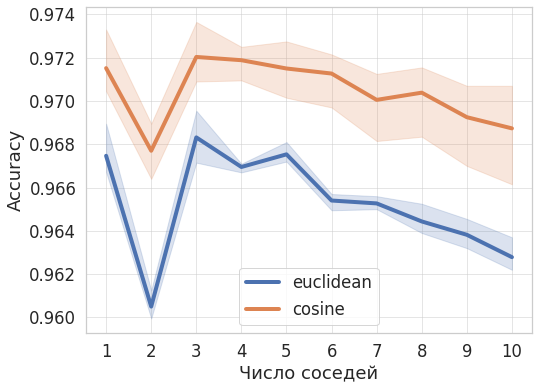

In [28]:
ax = sns.lineplot(data=k_accur_metric, x="k", y="accuracy", hue="metric")

ax.set_xlabel('Число соседей')
ax.set_ylabel('Accuracy')
ax.set(xticks=range(1,11))
ax.legend(loc='lower center')

ax.grid(which='both', alpha=0.5)

plt.show()

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

  - *Оптимальным $k$ для `MNIST` без весов будет $k=3$. При $k=3$ и $k=4$ косинусная мера в среднем даёт примерно одинаковую точность на фолдах, но при $k=3$ разброс шире и смещён выше.*


2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

    - *Косинусная мера даёт точность, которая равномерно больше точности евклидова расстояния. Евклидова метрика испытывает проклятие размерности, поэтому расстояние между объектами даёт меньше информации, чем направление.*
    
   
3. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.

    - *при $k=2$ наблюдается существенное падение точности, которое не вписывается в общий тренд. Это можно объяснить следующим образом: в случае невзвешенного KNN из меток двух ближайших соседей выбирается в качестве ответа одна из них случайным образом. В данных всегда есть выбросы, поэтому среди двух ближайших соседей может быть выброс. То есть невзвешенный KNN неустойчив к выбросам при $k=2$.*

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [ ]:
cv = KFold(n_splits=3)
k_list = np.arange(1, 11)
args = {'weights': 'distance',
        'algorithm': 'my_own',
        'metric': 'cosine',
        'batch_size': 2000}

w_cosine_score = knn_cross_val_score(
    X_train, y_train, k_list, 'accuracy', cv, **args)

#### Нарисуйте график зависимости точности от количества соседей 

In [ ]:
w_cosine_list = []
for k, accuracy_list in w_cosine_score.items():
    for score in accuracy_list:
        w_cosine_list.append([k, score])

w_k_accur_metric = pd.DataFrame(
    w_cosine_list, columns=['k', 'accuracy'])

w_k_accur_metric['weights'] = 'distance'
k_accur_metric['weights'] = 'uniform'
w_vs_unw = pd.concat([k_accur_metric, w_k_accur_metric], ignore_index=True)

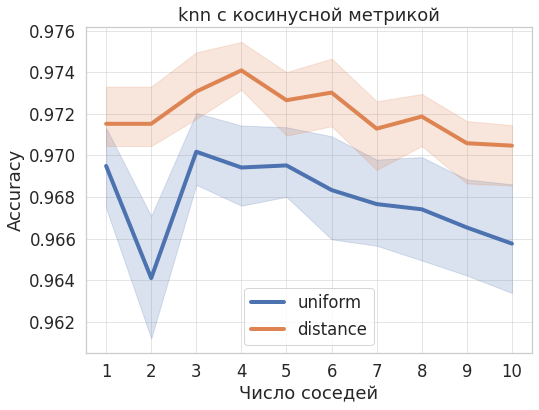

In [32]:
ax = sns.lineplot(data=w_vs_unw, x="k", y="accuracy", hue='weights')

ax.set_title('knn с косинусной метрикой')
ax.set_xlabel('Число соседей')
ax.set_ylabel('Accuracy')
ax.set(xticks=range(1,11))
ax.legend(loc='lower center')

ax.grid(which='both', alpha=0.5)

plt.show()

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.

   - *Оптимальным $k$ будет $k=4$, поскольку при нём на графике наблюдается максимум точности.*
   - *Оптимальной метрикой будет косинусная, т.к. во всех экспериментах она равномерно лучше евклидовой.*
   - *Оптимально использовать взвешенный алгоритм, его средняя точность на фолдах равномерно лучше*.



2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

   *Взвешенный алгоритм*
   - *точнее,*
   - *устойчивее (дов. интервал уже),*
   - *не имеет выбросов для разных $k$,*
  
  *т.к. веса назначают "степень важности" соседей, это даёт больше информации.*
   

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [ ]:
args = {
    'metric': 'cosine',
    'algorithm': 'my_own',
    'batch_size': 2000,
    'weights': 'distance'
}

model = BatchedKNNClassifier(n_neighbors=4, **args)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
origin_score = np.mean(y_test == y_hat)
origin_score

0.9752

In [ ]:
cv = KFold(n_splits=3)

origin_cv = knn_cross_val_score(
    X_train, y_train, [4], 'accuracy', cv, **args)

sum(origin_cv[4]) / len(origin_cv[4])

0.9740833333333333

   *В предыдущих экспериментах получен набор параметров, оптимальных по времени и точности.*

| Гиперпараметр | Оптимальное значение    |
|-------|------------|
| Поиск         | Собственный brute-поиск |
| Число соседей | $k=4$                   |
| Метрика       | Косинусная              |
| Вес           | distance                |

*С этими параметрами и обучающей выборкой $X^N$, точность предсказаний на $X^M$ оказалась равна $0.9752$. На кросс валидации по $X^N$ точность $0.9741$, т.е. ниже, чем на тесте. Это не предел точности, т.к. лучшая в мире модель для датасета `MNIST` достигает точности в $0.9991$.*

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

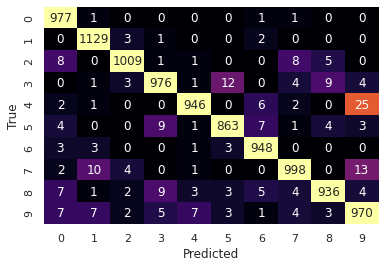

In [ ]:
conf_origin = confusion_matrix(y_test, y_hat)

ax = heatmap(conf_origin, annot=True, fmt='d', cbar=False, cmap='inferno', vmax=40)
ax.set(ylabel='True', xlabel='Predicted')

plt.show()

In [ ]:
fournine = X_test[(y_test == 4) & (y_hat == 9)].reshape(-1, 28, 28)
fournine.shape

(25, 28, 28)

In [ ]:
sevenine = X_test[(y_test == 7) & (y_hat == 9)].reshape(-1, 28, 28)
sevenine.shape

(13, 28, 28)

In [ ]:
threefive = X_test[(y_test == 3) & (y_hat == 5)].reshape(-1, 28, 28)
threefive.shape

(12, 28, 28)

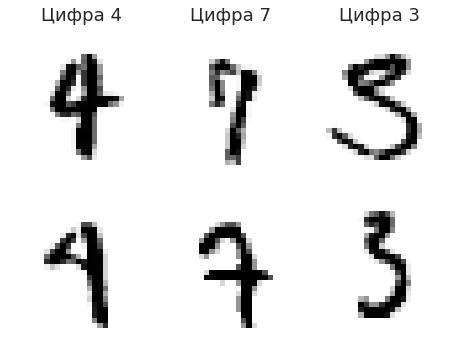

In [61]:
fig, axes = plt.subplots(2, 3)

for i in range(2):
  for j in range(3):
    axes[i,j].axis('off')

axes[0, 0].set_title('Цифра 4')
axes[0, 0].imshow(fournine[2], cmap='Greys')
axes[1, 0].imshow(fournine[3], cmap='Greys')

axes[0, 1].set_title('Цифра 7')
axes[0, 1].imshow(sevenine[1], cmap='Greys')
axes[1, 1].imshow(sevenine[2], cmap='Greys')

axes[0, 2].set_title('Цифра 3')
axes[0, 2].imshow(threefive[0], cmap='Greys')
axes[1, 2].imshow(threefive[2], cmap='Greys')

plt.subplots_adjust(wspace=0, hspace=0)

*Лучше всего алгоритм распознает и предсказывает цифры 0 и 6, т.к. ошибок, связанных с ними, меньше всего. Это отражено также в том, что метрики precision и recall для 0 и 6 одновременно большие*.

*Больше всего ошибок связно с числом 9. Самые частые ошибки: алгоритм принимает* 
- *4 за 9 (25 раз),*
- *7 за 9 (13 раз),*
- *3 за 5 (12 раз).*

## Бонус 1. Размножение обучающей выборки (3 балла)

Размножьте обучающую выборку с помощью поворотов, смещений, применений гауссовского фильтра и морфологических операций. Разрешается использовать библиотеки для работы с изображениями. Подобрать по кросс-валидации с 3 фолдами параметры преобразований. Рассмотреть следующие параметры для преобразований и их комбинации:
1. Величина поворота: 5, 10, 15 (в каждую из двух сторон)
2. Величина смещения: 1, 2, 3 пикселя (по каждой из двух размерностей)
3. Дисперсия фильтра Гаусса: 0.5, 1, 1.5
4. Морфологические операции: эрозия, дилатация, открытие, закрытие с ядром 2

Проанализируйте, как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

**Замечание.** Не обязательно хранить все обучающие выборки в процессе эксперимента. Достаточно вычислить ближайших соседей по каждой из выборок, а затем выбрать из них ближайших соседей.

**Замечание по дизайну эксперимента**. В этой части вам предлагается самим выбрать дизайн эксперимента. Перебор всевоможных комбинаций преобразований может быть затруднительным, в то время как жадный выбор преобразований уже даст улучшение в качестве.

In [ ]:
kernel = np.ones((2,2))

Пара утилит:

In [ ]:
def apply_all(X_train, func, param):
    """
    Применяет преобразование к каждому элементу X_train.
    
    - Если func not is None, то применяется преобразование func
      с параметром param;
    
    - Если func=None, то param воспринимается в качестве функции.

    Для следующих преобразований:
    - skimage.transform.rotate
    - scipy.ndimage.shift
    - scipy.ndimage.gaussian_filter
    - cv2.erode
    - cv2.dilate
    - cv2.morphologyEx

    Возвращает аугментированнию копию.
    """
    X = np.copy(X_train.reshape(-1, 28, 28))
    if func is None:        
        for i, img in enumerate(X):
            X[i] = param(img)
    else:
        for i, img in enumerate(X):
            X[i] = func(img, param)
    return X.reshape(X_train.shape[0], -1)

# аргументы, используемые во всех экспериментах ниже
aug_args = {    
    'metric': 'cosine',
    'algorithm': 'my_own',
    'batch_size': 2000,
    'weights': 'distance'
}

def cv_aug(X, y, n_folds, func, param_list):
    """
    Кроссвалидация по параметрам аугментации. Идейно происходит так:
    - для каждого фолда из KFold
      - для каждого параметра аугментации
        - аугментировать тренировочный фолд
        - обучиться на нём
        - сделать предсказание на тестовом фолде
        - занести accuracy в журнал (словарь) кроссвалидации
    Возвращает словарь кроссвалидации
    """
    cv = KFold(n_splits=n_folds)
    score = {param: [] for param in param_list}
    for train_index, test_index in cv.split(X):
        model = BatchedKNNClassifier(n_neighbors=4, **aug_args)
        for param in param_list:            
            X_aug = apply_all(X[train_index], func=func, param=param)
            
            X_aug = np.vstack([X[train_index], X_aug])
            y_aug = np.tile(y[train_index], 2)

            model.fit(X_aug, y_aug)
            y_hat = model.predict(X[test_index])

            score[param].append(np.mean(y[test_index] == y_hat))
    return score

def augment_train(X_train, y_train, func, param):
  """
  Строит эффективную по памяти аугментацию обучающей выборки.
  Алгоритм:
  - Создать аугментированную копию обучающей выборки
  - Посчитать матрицу попарных расстояний от неё до тестовой выборки
  - Отбросить все её элементы, которые не являются <=4 соседом
    ни для одного элемента тестовой выборки
  - Оставшиеся элементы добавить в обучающую выборку
  
  Возвращает обучающую выборку, расширенную указанным способом
  """
  global X_test
  
  X = apply_all(X_train, func, param)
  
  model = BatchedKNNClassifier(n_neighbors=4, **aug_args)
  model.fit(X, y_train)
  
  k_indices = model.kneighbors(X_test, False)
  indices = np.unique(k_indices)
  
  X_ans = np.vstack([X_train, X[indices]])
  y_ans = np.concatenate([y_train, y_train[indices]])
  
  return X_ans, y_ans

def compute_conf(X_train, y_train):
  """
  - Обучение knn с оптимальными параметрами по переданной выборке.
  - Вычисление предсказаний для тестовой выборки
  - Построение матрицы ошибок
  
  Возвращает матрицу ошибок
  """
  global X_test

  model = BatchedKNNClassifier(n_neighbors=4, **aug_args)
  model.fit(X_train, y_train)
  y_hat = model.predict(X_test)
  score = np.mean(y_hat == y_test)
  conf = confusion_matrix(y_test, y_hat)  

  return score, conf

def draw_heatmap(conf, vmax=40):
  """
  Нарисовать матрицу ошибок с указанным vmax.
  """
  ax = heatmap(conf, annot=True, fmt='d', cbar=False, cmap='inferno', vmax=vmax)
  ax.set(ylabel='True', xlabel='Predicted')
  plt.show()

### Поворот

#### Выбор угла

In [ ]:
angles = np.arange(-15, 16, 5)
rotate_score = cv_aug(X_train, y_train, 3, func=rotate, param_list=angles)

In [ ]:
dill.dump_session('/content/drive/MyDrive/aiknn/session.db')

#### График

In [ ]:
rotate_score_list = []
for angle, score_list in rotate_score.items():
  for score in score_list:
    rotate_score_list.append([angle, score])

rotate_df = pd.DataFrame(rotate_score_list, columns=['angle', 'score'])

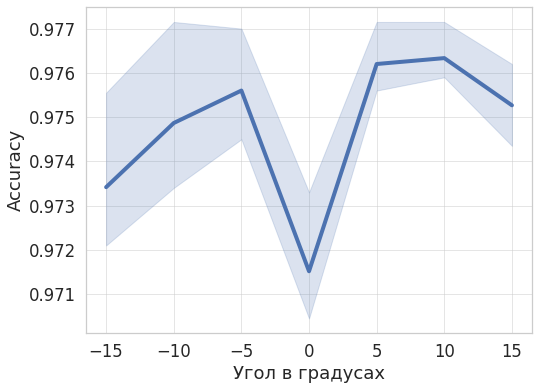

In [34]:
# fig, ax = plt.subplots(figsize=(4,4))
ax = sns.lineplot(data=rotate_df, x="angle", y="score")

ax.set_xlabel('Угол в градусах')
ax.set_ylabel('Accuracy')
ax.set_xticks(angles)

ax.grid(which='both', alpha=0.5)
plt.show()

#### Анализ матрицы ошибок

In [ ]:
X_train_rotated, y_train_rotated = augment_train(
    X_train, y_train, func=rotate, param=10)

In [ ]:
rotated_score, rotated_conf = compute_conf(X_train_rotated, y_train_rotated)
rotated_score

0.9794

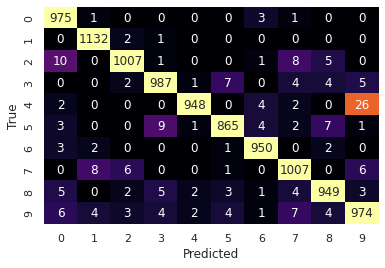

In [ ]:
draw_heatmap(rotated_conf)

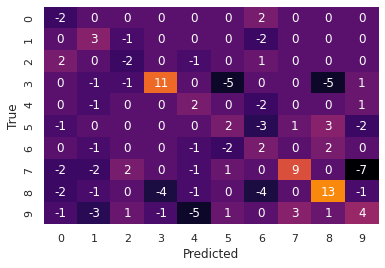

In [ ]:
draw_heatmap(rotated_conf - conf_origin, vmax=20)

*Увеличение значений на главной диагонали говорит о положительном изменении. Число ошибок увеличилось только для цифры 2. Детально:*

_**Отрицательные изменения вне диагонали:**_
- *Число подмен 4 на 9 увеличилось на 1. То есть самая частая ошибка не исчезла.*
- *Число подмен 2 на 0 увеличилось на 2. Теперь это вторая по частоте ошибка.*
- *Число подмен 9 на 7 увеличилось на 3. Но все равно это не слишком частая ошибка.*

_**Положительные изменения вне диагонали:**_
- *Число подмен 7 за 9 упало на 7. Это была вторая по частоте ошибка.*
- *Число подмен 3 за 5 упало на 5. Это была третья по частоте ошибка.*

_**Поворот изображения однозначно полезное преобразование.**_

### Сдвиг

#### Выбор величины и направления

In [ ]:
shift_list = []
for i in range(-3,4):
    for j in range(-3,4):
        shift_list.append((i, j))

shift_score = cv_aug(X_train, y_train, 3, func=shift, param_list=shift_list)

#### График

In [ ]:
shift_map = np.empty((7, 7))
for coords, score in shift_score.items():
  x, y = coords
  shift_map[x + 3, y + 3] = sum(score) / len(score)

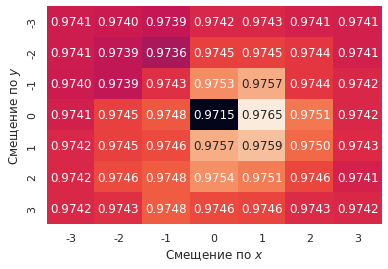

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
heatmap(shift_map, annot=True, fmt='.4f', cbar=False, ax=ax)
ax.set(ylabel=r'Смещение по $y$', xlabel=r'Смещение по $x$')
ax.set_xticklabels(range(-3,4))
ax.set_yticklabels(range(-3,4))

plt.show()

In [ ]:
dill.dump_session('/content/drive/MyDrive/aiknn/session.db')

#### Анализ матрицы ошибок

In [ ]:
X_train_shifted, y_train_shifted = augment_train(
    X_train, y_train, func=shift, param=(0,1))

In [ ]:
shifted_score, shifted_conf = compute_conf(X_train_shifted, y_train_shifted)
shifted_score

0.9759

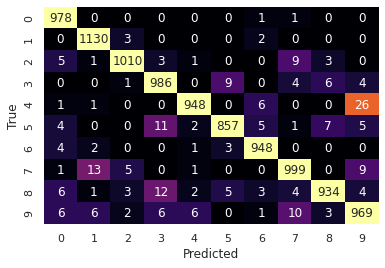

In [ ]:
draw_heatmap(shifted_conf)

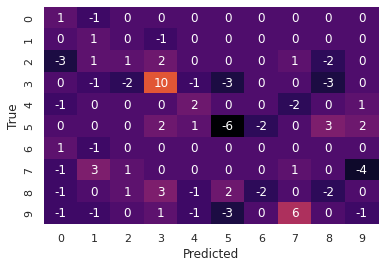

In [ ]:
draw_heatmap(shifted_conf - conf_origin, vmax=20)

_**Главная диагональ:**_
- *Число ошибок для цифры 5 увеличилось на 6.*
- *Ошибок для цифр 8 и 9 стало немного больше.*
- *Существенный плюс: для цифры 10 ошибок стало меньше на 10.*

_**Отрицательные изменения вне диагонали:**_
- *Число подмен 9 на 7 увеличилось на 6.*
- *Число подмен 4 на 9 увеличилось на 1. То есть самая частая ошибка не исчезла.*

_**Положительные изменения вне диагонали:**_
- *Число подмен 7 на 9 уменьшилось на 4. Это была вторая по частоте ошибка.*
- *Число подмен 2 на 0 уменьшилось на 2.*

_**Польза сдвига изображения неоднозначна.**_

### Размытие

#### Выбор дисперсии

In [ ]:
blur_list = [0, 0.5, 1, 1.5]
blur_score = cv_aug(
    X_train, y_train, 3, func=gaussian_filter, param_list=blur_list)

#### График

In [ ]:
blur_score_list = []
for sigma, score_list in blur_score.items():
  for score in score_list:
    blur_score_list.append([sigma, score])

blur_df = pd.DataFrame(blur_score_list, columns=['sigma', 'score'])

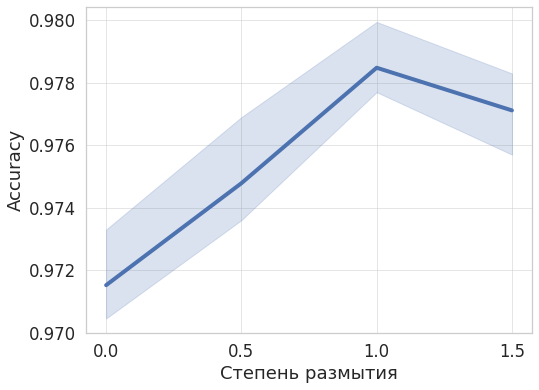

In [35]:
ax = sns.lineplot(data=blur_df, x="sigma", y="score")

ax.set_xlabel('Степень размытия')
ax.set_ylabel('Accuracy')

ax.set_xticks([0, 0.5, 1, 1.5])

ax.grid(which='both', alpha=0.5)

plt.show()

#### Анализ матрицы ошибок

In [ ]:
X_train_blured, y_train_blured = augment_train(
    X_train, y_train, func=gaussian_filter, param=1.0)

In [ ]:
blured_score, blured_conf = compute_conf(X_train_blured, y_train_blured)
blured_score

0.9814

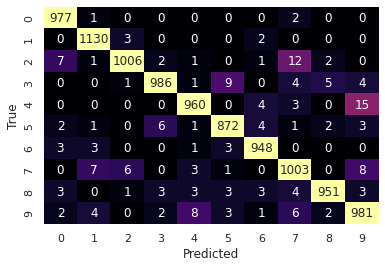

In [ ]:
draw_heatmap(blured_conf)

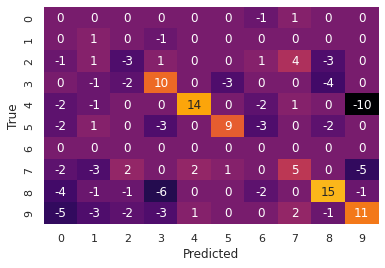

In [ ]:
draw_heatmap(blured_conf - conf_origin, vmax=20)

_**На главной диагонали:**_
- *Цифры 3, 4, 5, 7, 8, 9 теперь распознаются существенно лучше*
- *Ухудшение только для цифры 2.*

_**Отрицательные изменения вне диагонали:**_
- *Число подмен 2 на 7 увеличилось на 4. Теперь это втоаря по частоте ошибка.*

_**Положительные изменения вне диагонали:**_
- *Число подмен 4 на 9 уменьшилось на 10. Но это всё ещё самая частая ошибка.*

_**Размытие является крайне полезным преобразованием.**_

### Морфологическое преобразование

#### Выбор морфологии

In [ ]:
from functools import partial

kernel = np.ones((2,2))

op = partial(morphologyEx, op=MORPH_OPEN, kernel=kernel)
cl = partial(morphologyEx, op=MORPH_CLOSE, kernel=kernel)

er = partial(erode, kernel=kernel)
dil = partial(dilate, kernel=kernel)

morph_list = [er, dil, op, cl]
morph_score = cv_aug(X_train, y_train, 3, func=None, param_list=morph_list)

#### График

In [ ]:
morph2str = {
    op: 'open',
    cl: 'close',
    er: 'erode',
    dil: 'dilate'
}

morph_score_list = []
for func, score_list in morph_score.items():
  for score in score_list:
    morph_score_list.append([morph2str[func], score])

for score in origin_cv[4]:
  morph_score_list.append(['original', score])

morph_df = pd.DataFrame(morph_score_list, columns=['morph', 'score'])

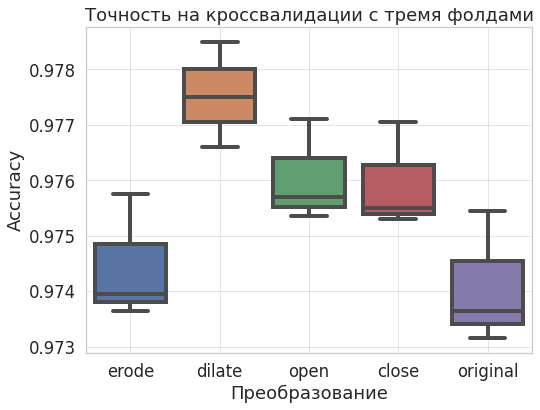

In [64]:
ax = sns.boxplot(data=morph_df, x="morph", y="score")

ax.set_title('Точность на кроссвалидации с тремя фолдами')
ax.set_xlabel('Преобразование')
ax.set_ylabel('Accuracy')

ax.grid(which='both', alpha=0.5)

plt.show()

In [ ]:
dill.dump_session('/content/drive/MyDrive/aiknn/session.db')

#### Анализ матрицы ошибок

In [ ]:
X_train_morph, y_train_morph = augment_train(
    X_train, y_train, func=None, param=dil)

In [ ]:
morph_score, morph_conf = compute_conf(X_train_morph, y_train_morph)
morph_score

0.9771

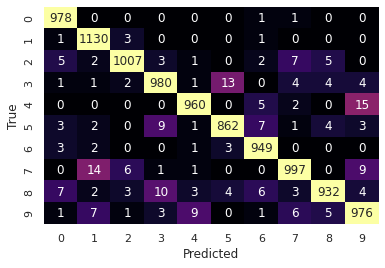

In [ ]:
draw_heatmap(morph_conf)

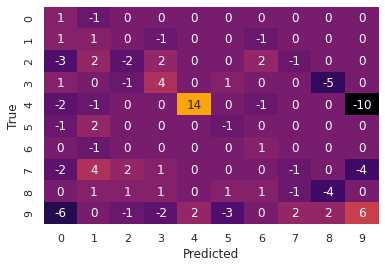

In [ ]:
draw_heatmap(morph_conf - conf_origin, vmax=20)

_**На главной диагонали:**_
- *Существенный плюс с цифрой 4.*
- *Лучше распознавание цифры 6.*
- *В целом изменения остутствуют*

_**Отрицательные изменения вне главной диагонали:**_
- *Число подмен 7 на 1 выросло на 4. Теперь это вторая по частоте ошибка.*

_**Положительные изменения вне главной диагонали:**_
- *Число подмен 4 на 9 уменьшилось на 10. Но все равно это первая по частоте ошибка.*
- *Число подмен 9 на 1 уменьшилось на 6.**

_**Польза дилатации очевидна.**_

### Пример преобразований

In [51]:
rot = partial(rotate, angle=10)
sh = partial(shift, shift=(0,1))
blur = partial(gaussian_filter, sigma=1)

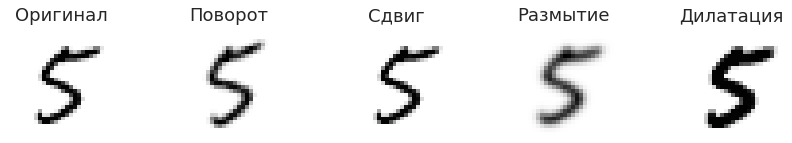

In [60]:
img = X_test[129].reshape(28, 28)

fig, axes = plt.subplots(1, 5, figsize=(15,2))

for i in range(5):
    axes[i].axis('off')

axes[0].set_title('Оригинал')
axes[0].imshow(img, cmap='Greys')

axes[1].set_title('Поворот')
axes[1].imshow(rot(img), cmap='Greys')

axes[2].set_title('Сдвиг')
axes[2].imshow(sh(img), cmap='Greys')

axes[3].set_title('Размытие')
axes[3].imshow(blur(img), cmap='Greys')

axes[4].set_title('Дилатация')
axes[4].imshow(dil(img), cmap='Greys')

plt.subplots_adjust(wspace=0, hspace=0)

### Контроль

In [ ]:
L = X_train.shape[0]

X_train_augmented = np.vstack(
    [X_train_rotated, X_train_shifted[L:],
     X_train_blured[L:], X_train_morph[L:]]
)

y_train_augmented = np.concatenate(
    [y_train_rotated, y_train_shifted[L:],
     y_train_blured[L:], y_train_morph[L:]]
)

X_train_augmented.shape, y_train_augmented.shape

((140427, 784), (140427,))

In [ ]:
final_score, final_conf = compute_conf(X_train_augmented, y_train_augmented)
final_score

0.9841

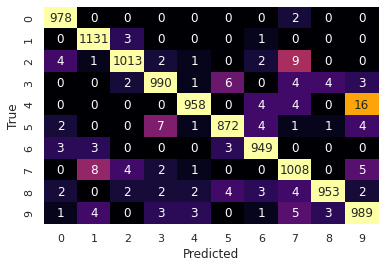

In [ ]:
draw_heatmap(final_conf, vmax=20)

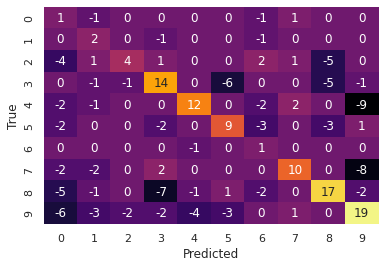

In [ ]:
draw_heatmap(final_conf - conf_origin, vmax=20)

_**На главной диагонали:**_
- *Цифры 4, 5, 7, 8, 9 распознаются существенно лучше.*
- *Остальные цифры распознаются так же, без изменений.*

_**Положительные изменения вне диагонали:**_
- *Число подмен 4 на 9 уменьшилось на 9,*
- *Число подмен 3 на 5 уменьшилось на 6,*
- *Число подмен 7 на 9 уменьшилось на 8.*

_**Отрицательные изменения вне диагонали:**_
- *Число подмен 2 на 6 увеличилось на 2*
- *Число подмен 7 на 3 увеличилось на 2*
- *Число подмен 9 на 7 увеличилось на 1*

_Аугментация обучающей выборки повысила accuracy с 0.9752 до 0.9841, т.е. почти на 1 процент. Такой подход можно называть крайне полезным._

## Бонус 2. Размножение тестовой выборки (2 балла)

Реализуйте предложенный на семинаре алгоритм, основанный на преобразовании объектов тестовой выборки.
Проверьте то же самое множество параметров, что и в предыдущем пункте.

Проанализируйте как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

In [ ]:
## your code here ##

## Бонус 3. Сравнение подходов (1 балл)

Если вы реализовали оба подхода, сравните их между собой.

1. Какой подход даёт больший выигрыш в качестве и почему?

    *ваш ответ*
    

2. Есть ли какие-то преимущества у худшего по качеству подхода по сравнению с лучшим?

    *ваш ответ*